In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [3]:
# Change this to point to the data directory
base_path = ""
results_dir = f"{base_path}/ctu13_neris/supervised/poisoning_8_feats/AutoEncoder"
fstrats = os.listdir(results_dir)
print("Found experiments: {}".format(fstrats))

Found experiments: ['entropy', 'gini']


In [4]:
results = []

for fstrat in fstrats:
    
    for exp in os.listdir(os.path.join(results_dir, fstrat)):
        exp_dir = os.path.join(results_dir, fstrat, exp)

        try:
            with open(os.path.join(exp_dir, "args.json"), "r") as f:
                args = json.load(f)

            with open(os.path.join(exp_dir, "results.json"), "r") as f:
                res = json.load(f)

            to_append = {}
            to_append.update(args)
            to_append.update(res)
            results.append(to_append)

        except:
            print("Missing {}".format(exp_dir))
            pass

results_df = pd.DataFrame.from_dict(results)

In [5]:
print(list(results_df.columns))

['seed', 'scenario', 'subscenario', 'target', 'fstrat', 'vstrat', 'p_frac', 'n_features', 'window', 'test_number', 'trigger_size', 'selected_features', 'selected_features_names', 'f1_model_poison_preds_clean', 'acc_model_poison_preds_clean', 'f1_model_preds_clean', 'acc_model_preds_clean', 'f1_model_poison_preds_trigger', 'acc_model_poison_preds_trigger', 'f1_model_preds_trigger', 'acc_model_preds_trigger', 'f1_preds_poison_test', 'acc_preds_poison_test', 'f1_preds_clean_test', 'acc_preds_clean_test', 'n_conns_after']


## Focus on numerical results

In [6]:
interesting_feats = (
    list(results_df.columns[:3])
    + list(results_df.columns[5:8])
    + list(results_df.columns[11:12])
    + ["acc_model_poison_preds_trigger", "acc_preds_clean_test"]
)


In [7]:
results_df.sort_values(by=["p_frac", "subscenario"])

,seed,scenario,subscenario,target,fstrat,vstrat,p_frac,n_features,window,test_number,...,acc_model_preds_clean,f1_model_poison_preds_trigger,acc_model_poison_preds_trigger,f1_model_preds_trigger,acc_model_preds_trigger,f1_preds_poison_test,acc_preds_poison_test,f1_preds_clean_test,acc_preds_clean_test,n_conns_after
6,42,neris,0,0,entropy,95th,0.0025,8,100,200,...,0.993762,0.984772,0.970,1.000000,1.000,0.994975,0.990,1.0,1.0,6450
15,23,neris,0,0,entropy,95th,0.0025,8,100,200,...,0.993762,0.966408,0.935,1.000000,1.000,0.950131,0.905,1.0,1.0,6450
24,2022,neris,0,0,entropy,95th,0.0025,8,100,200,...,0.993762,0.955614,0.915,1.000000,1.000,0.984772,0.970,1.0,1.0,6450
71,42,neris,0,0,gini,95th,0.0025,8,100,200,...,0.993762,0.692810,0.530,0.997494,0.995,0.830409,0.710,1.0,1.0,6450
80,23,neris,0,0,gini,95th,0.0025,8,100,200,...,0.993762,0.982188,0.965,1.000000,1.000,0.994975,0.990,1.0,1.0,6450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,neris,1,0,entropy,95th,0.1000,8,100,200,...,0.991187,0.473282,0.310,1.000000,1.000,0.976982,0.955,1.0,1.0,252150
61,1,neris,1,0,entropy,95th,0.1000,8,100,200,...,0.991187,0.513011,0.345,1.000000,1.000,0.989899,0.980,1.0,1.0,252150
62,42,neris,1,0,entropy,95th,0.1000,8,100,200,...,0.991187,0.400000,0.250,1.000000,1.000,0.994975,0.990,1.0,1.0,252150
63,23,neris,1,0,entropy,95th,0.1000,8,100,200,...,0.991187,0.701299,0.540,1.000000,1.000,0.997494,0.995,1.0,1.0,252150


In [8]:
results_df.columns

Index(['seed', 'scenario', 'subscenario', 'target', 'fstrat', 'vstrat',
       'p_frac', 'n_features', 'window', 'test_number', 'trigger_size',
       'selected_features', 'selected_features_names',
       'f1_model_poison_preds_clean', 'acc_model_poison_preds_clean',
       'f1_model_preds_clean', 'acc_model_preds_clean',
       'f1_model_poison_preds_trigger', 'acc_model_poison_preds_trigger',
       'f1_model_preds_trigger', 'acc_model_preds_trigger',
       'f1_preds_poison_test', 'acc_preds_poison_test', 'f1_preds_clean_test',
       'acc_preds_clean_test', 'n_conns_after'],
      dtype='object')

## Entropy fstrat

In [18]:
asr = 1 - results_df["acc_model_poison_preds_trigger"]
results_df["asr"] = asr

In [20]:
poison_pct = results_df["p_frac"] * 100
results_df["Poison percentage (%)"] = poison_pct

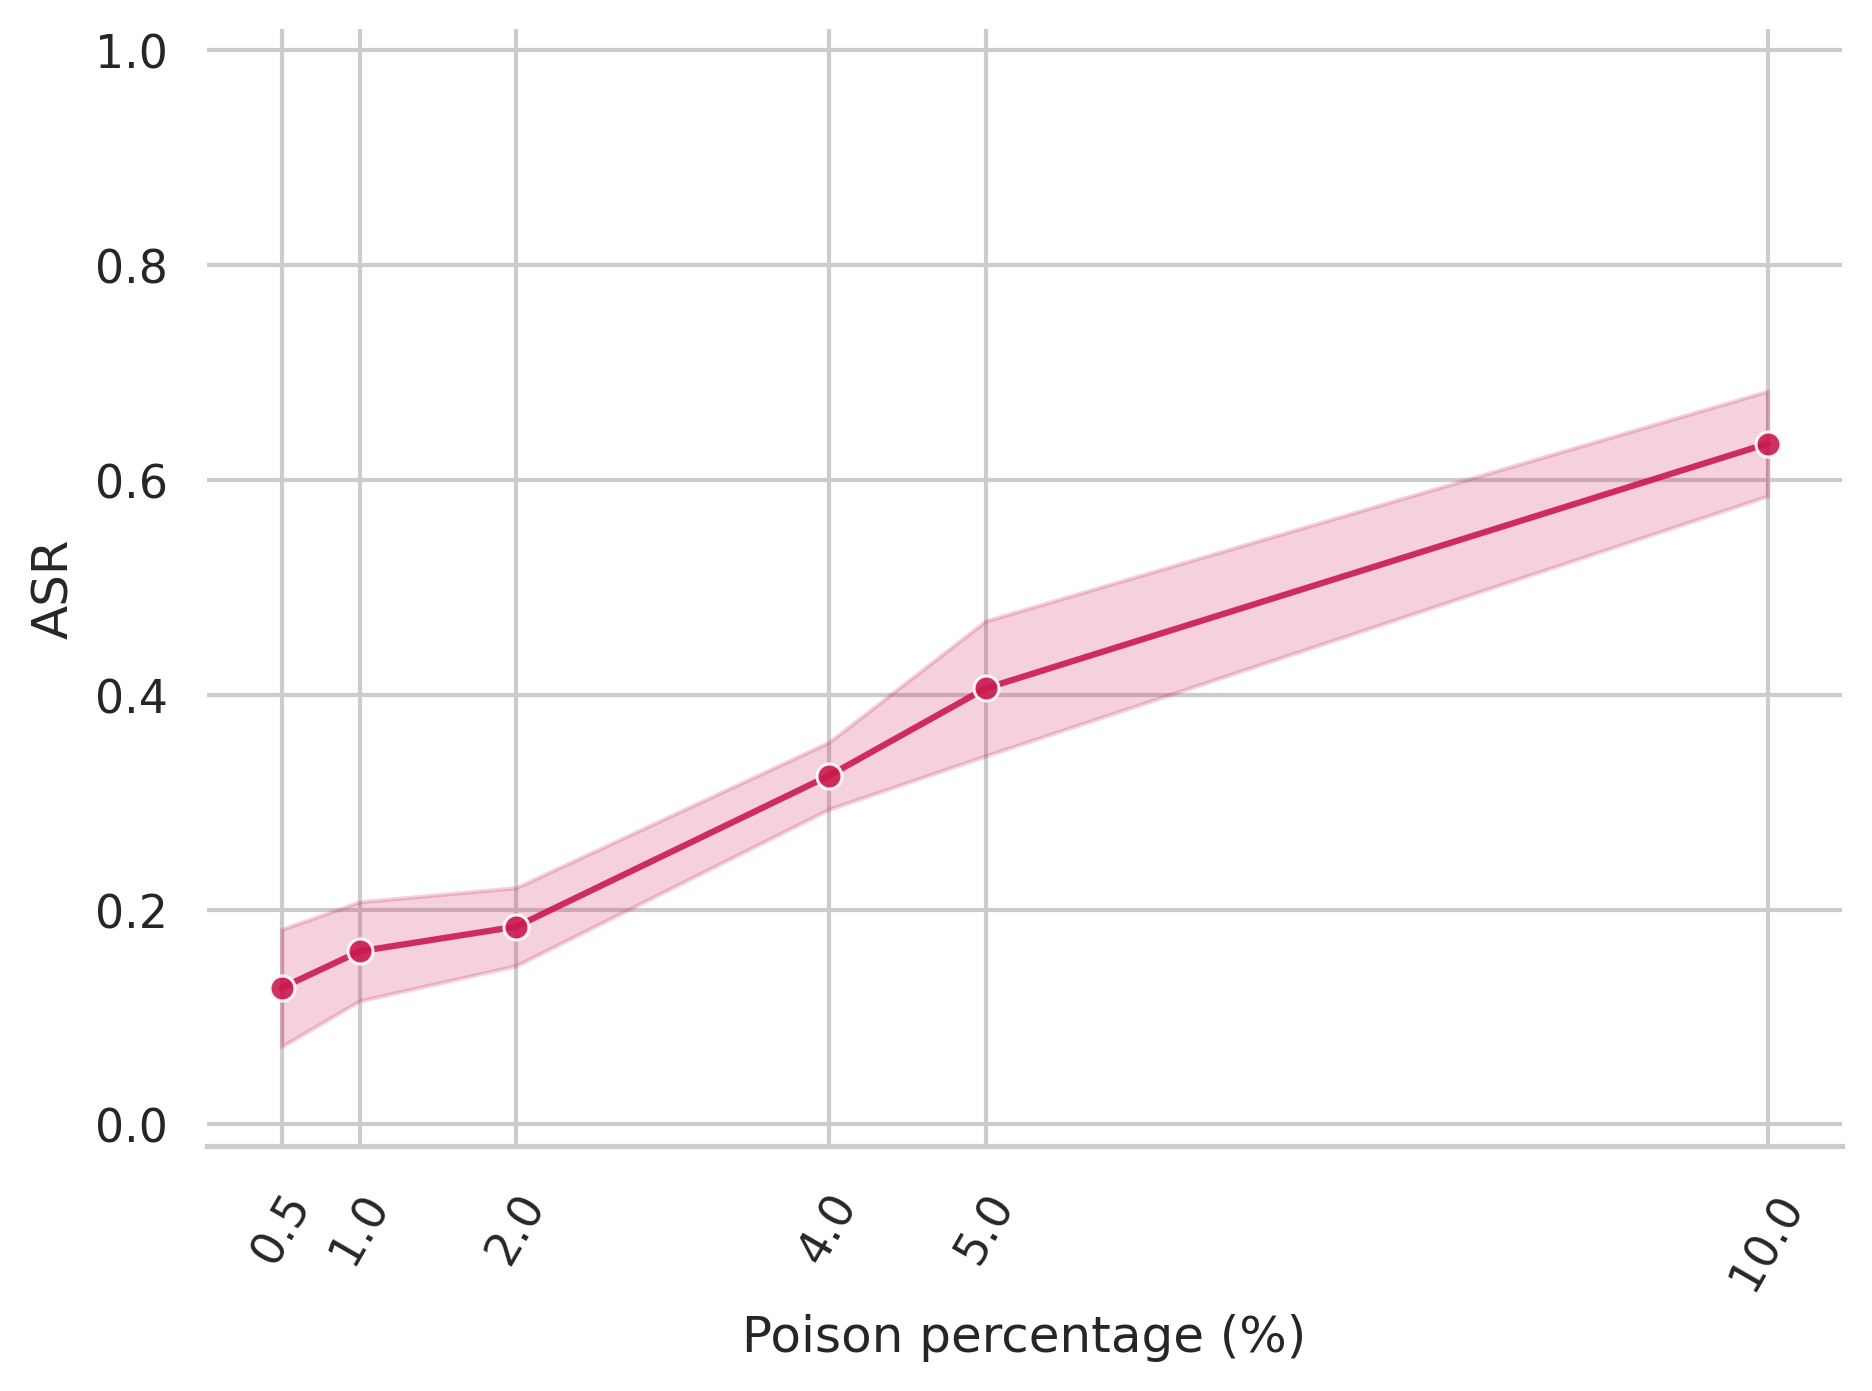

In [21]:
to_show = results_df[(results_df["fstrat"] == "entropy") & (results_df["Poison percentage (%)"] > 0.25)]
sns.set_theme(style="whitegrid")
x_ticks = sorted(to_show["Poison percentage (%)"].unique())

# Setup seaborn to get the best results on a paper
sns.set(rc={"figure.dpi":300})
# sns.set(rc={"figure.dpi":96})
sns.set_context("paper", font_scale=1.5)
sns.set_theme(style="whitegrid")
# fig, ax = plt.subplots(len(trigger_types), 1, figsize=(9, len(trigger_types) * 5))

no_eb = False
if no_eb:
    eb = None
else:
    eb = ("se")

lp = sns.lineplot(
    x="Poison percentage (%)",
    y="asr",
    data=to_show,
    alpha=0.9,
    marker="o",
    errorbar=eb,
    linewidth=1.5,
    estimator="mean",
    palette="rocket_r",
    hue="fstrat",
    legend=False
)

lp.set_ylim(-0.02, 1.02)


# Show the elements of the x axis
lp.set_xticks(x_ticks)
lp.set_ylabel("ASR")

# Format legend
# leg = lp.get_legend()
# leg.set_title(readable["fstrat"])
# texts_to_change = [readable[t.get_text()] for t in leg.texts]
# for t, l in zip(leg.texts, texts_to_change):
#     t.set_text(l)
# # Move the legend below the plot at the center
# sns.move_legend(lp, "lower center", bbox_to_anchor=(0.5, -0.5), ncol=4, frameon=False)

# Set title
# lp.set_title(
#     f"ASR on AutoEncoder classifier - Entropy strategy"
# )

# Tilt the x ticks 60 degrees
lp.set_xticklabels(lp.get_xticklabels(), rotation=60)

# Despine
sns.despine(left=True, right=True)

plt.tight_layout()
plt.show()


In [22]:
# Group by subscenario, p_frac and compute mean and std of asr
to_show.groupby(["subscenario", "p_frac"]).agg({"asr": ["mean", "std"]})

asr          
                        mean       std
subscenario p_frac                    
0           0.005   0.150000  0.093408
            0.010   0.183333  0.105396
            0.020   0.155000  0.142916
            0.040   0.311667  0.099289
1           0.005   0.013000  0.009083
            0.010   0.066000  0.045056
            0.020   0.166000  0.134136
            0.040   0.362000  0.100287
            0.050   0.406000  0.140419
            0.100   0.634000  0.109167
2           0.005   0.294416  0.282080
            0.010   0.297800  0.224520
            0.020   0.243655  0.093047
            0.040   0.275804  0.127646

In [29]:
# Group by subscenario, p_frac and compute mean and std of asr
mean_test_f1s = to_show[to_show["subscenario"] == 1].groupby(["p_frac"]).agg({"f1_model_poison_preds_clean": ["mean"]})
display(mean_test_f1s)
reference_f1 = 0.7199999999999999
mean_test_f1_deltas = mean_test_f1s - reference_f1
display(mean_test_f1_deltas)

,f1_model_poison_preds_clean
,mean
p_frac,
0.005,0.717253
0.010,0.716166
0.020,0.714040
0.040,0.710263
0.050,0.709429
0.100,0.713147


,f1_model_poison_preds_clean
,mean
p_frac,
0.005,-0.002747
0.010,-0.003834
0.020,-0.005960
0.040,-0.009737
0.050,-0.010571
0.100,-0.006853
